In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
DATA_ROOT = Path(
    "/home/pirie03/projects/aip-medilab/pirie03/ProstateMicroSeg/dataset/raw/Dataset120_MicroUSProstate"
)

img_path = DATA_ROOT / "imagesTr" / "microUS_01_0000.nii.gz"
lbl_path = DATA_ROOT / "labelsTr" / "microUS_01.nii.gz"


In [3]:
img_nii = nib.load(img_path)
lbl_nii = nib.load(lbl_path)

img = img_nii.get_fdata()
lbl = lbl_nii.get_fdata()


In [5]:
print("Image:")
print("  shape:", img.shape)
print("  dtype:", img.dtype)
print("  min & max:", img.min(), img.max())

print("\nLabel:")
print("  shape:", lbl.shape)
print("  dtype:", lbl.dtype)
print("  unique values:", np.unique(lbl))


Image:
  shape: (1372, 962, 45)
  dtype: float64
  min & max: 0.0 254.0

Label:
  shape: (1372, 962, 45)
  dtype: float64
  unique values: [0. 1.]


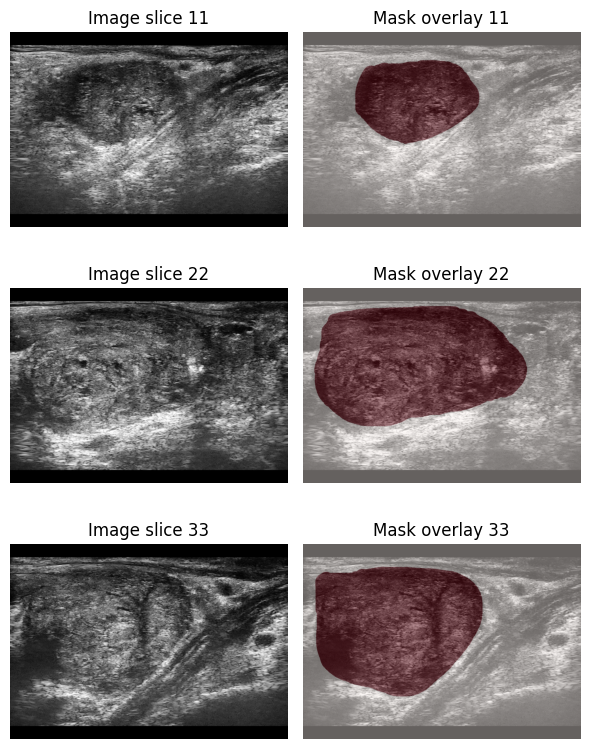

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Pick 3 slices
slice_indices = [
    img.shape[2] // 4,
    img.shape[2] // 2,
    3 * img.shape[2] // 4
]

# Create figure
fig, axes = plt.subplots(len(slice_indices), 2, figsize=(6, 8))

for i, s in enumerate(slice_indices):
    # Rotate image slice for viewing
    img_slice = np.rot90(img[:, :, s])
    lbl_slice = np.rot90(lbl[:, :, s])

    # Raw image
    axes[i, 0].imshow(img_slice, cmap="gray")
    axes[i, 0].set_title(f"Image slice {s}")
    axes[i, 0].axis("off")

    # Image + mask overlay
    axes[i, 1].imshow(img_slice, cmap="gray")
    axes[i, 1].imshow(lbl_slice, alpha=0.4, cmap="Reds")
    axes[i, 1].set_title(f"Mask overlay {s}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()
